# 📊 02 – Factor Modeling with PCA and Regression

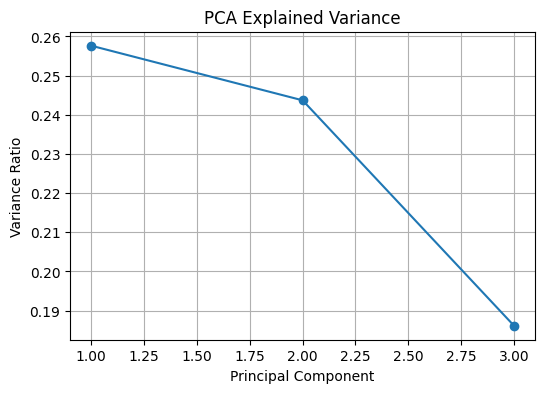

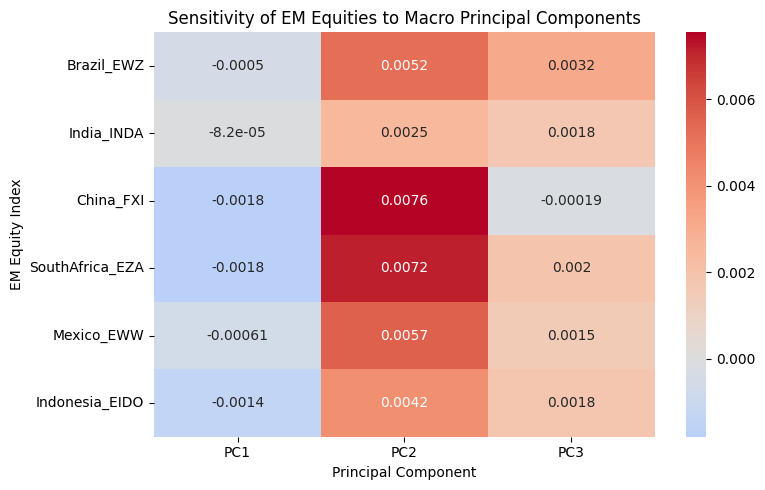

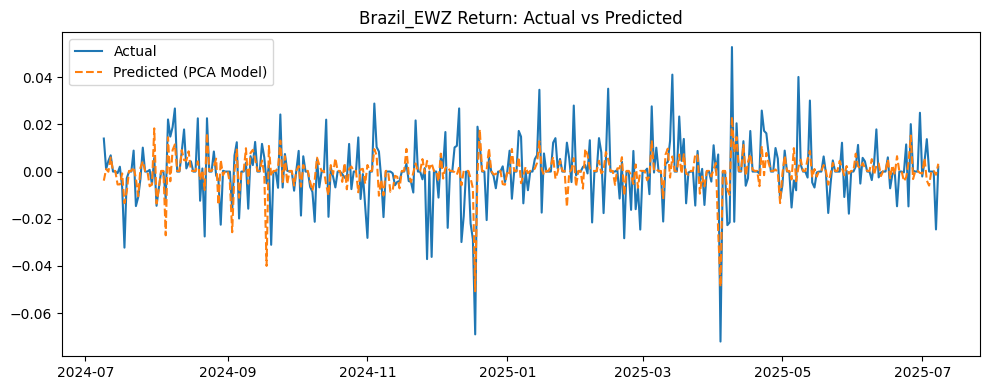

In [3]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/combined_em_macro_data.txt', parse_dates=['date'], index_col='date')
log_returns = np.log(df / df.shift(1)).dropna()

em_columns = [col for col in df.columns if col.startswith(('Brazil', 'India', 'China', 'SouthAfrica', 'Mexico', 'Indonesia'))]
macro_columns = [col for col in df.columns if col not in em_columns]

Y = log_returns[em_columns]
X = log_returns[macro_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), explained_var, marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()

betas = {}
r2_scores = {}
for col in Y.columns:
    model = LinearRegression().fit(X_pca, Y[col])
    betas[col] = model.coef_
    r2_scores[col] = model.score(X_pca, Y[col])

beta_df = pd.DataFrame(betas, index=['PC1', 'PC2', 'PC3']).T

plt.figure(figsize=(8, 5))
sns.heatmap(beta_df, annot=True, cmap='coolwarm', center=0)
plt.title('Sensitivity of EM Equities to Macro Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('EM Equity Index')
plt.tight_layout()
plt.show()

sample_col = 'Brazil_EWZ'
model = LinearRegression().fit(X_pca, Y[sample_col])
Y_pred = model.predict(X_pca)

plt.figure(figsize=(10, 4))
plt.plot(Y.index, Y[sample_col], label='Actual', linewidth=1.5)
plt.plot(Y.index, Y_pred, label='Predicted (PCA Model)', linestyle='--')
plt.title(f"{sample_col} Return: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()
